In [1]:
import pandas as pd
df=pd.read_csv("C:/Personal/Susi/Barcelona_Activa/Project/Dataset/AI_Impact_on_Jobs_2030.csv")

In [2]:
df1=df.copy()

In [3]:
df1

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Doctor,111319,6,Bachelor's,0.24,1.18,0.20,Low,0.73,0.37,0.99,0.07,0.08,0.92,0.65,0.33,0.76,0.45
2996,UX Researcher,44363,29,PhD,0.65,0.74,0.35,Medium,0.23,0.48,0.05,0.88,0.56,0.29,0.69,0.80,0.61,0.20
2997,Data Scientist,61325,23,Master's,0.64,0.94,0.39,Medium,0.28,0.62,0.73,0.21,0.96,0.01,0.70,0.29,0.48,0.57
2998,Graphic Designer,110296,7,PhD,0.95,1.23,0.46,Medium,0.21,0.18,0.14,0.22,0.55,0.68,0.31,0.55,0.34,0.70


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
three_blue_palette = [
  "#5DADE2",  
  "#E8A2B8",  
  "#6FBF73",  
  "#E67E22",  
  "#C9A227",  
  "#34495E",  
  "#7F8C8D",  
  "#2C3E50"   
]
sns.set_palette(three_blue_palette)
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "axes.labelweight": "bold",
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "legend.title_fontsize": 11,
    "axes.edgecolor": "#333333",
    "grid.alpha": 0.3
})


In [ ]:
Which job roles have the highest automation probability by 2030?

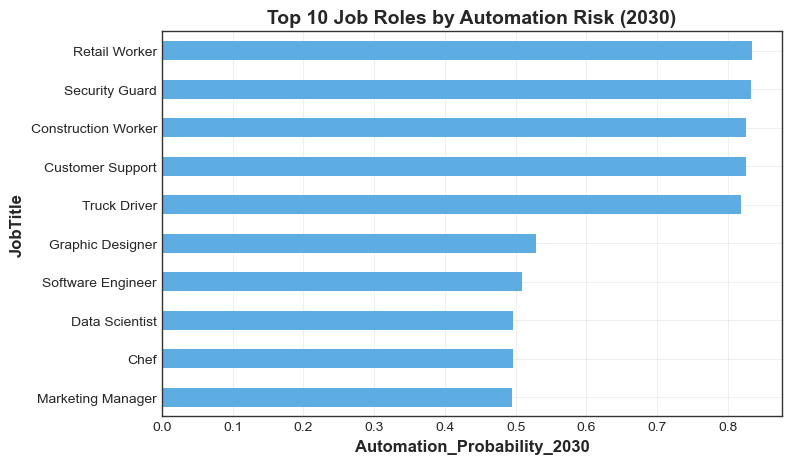

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

top_jobs = (
    df1.groupby("Job_Title")["Automation_Probability_2030"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(8,5))
top_jobs.plot(kind='barh')
plt.xlabel("Automation_Probability_2030")
plt.ylabel("JobTitle")
plt.title("Top 10 Job Roles by Automation Risk (2030)") 
plt.gca().invert_yaxis()
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\ai_impact_job_automation", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
Which job roles are safest from automation (lowest risk and probability)?

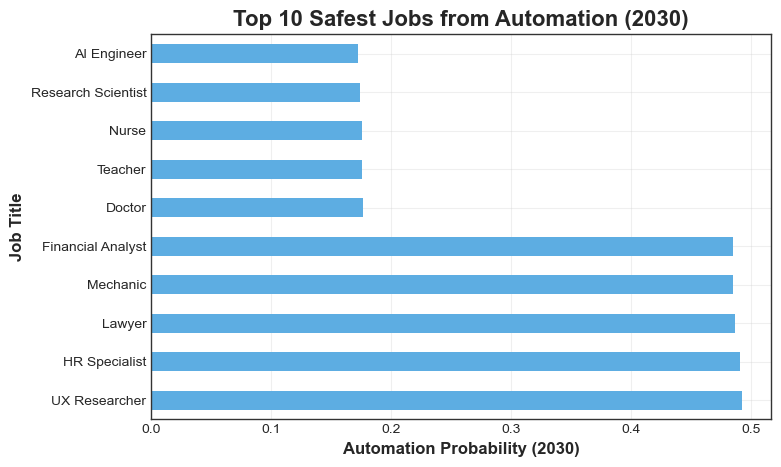

In [11]:
safe_jobs = (
    df1.groupby("Job_Title")["Automation_Probability_2030"]
    .mean()
    .sort_values(ascending=True)  
    .head(10)
)

plt.figure(figsize=(8,5))
safe_jobs.plot(kind='barh') 
plt.xlabel("Automation Probability (2030)", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
plt.title("Top 10 Safest Jobs from Automation (2030)", fontsize=16)
plt.gca().invert_yaxis()  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\ai_impact_safest_automation", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
Do higher-paying jobs face lower automation risk?

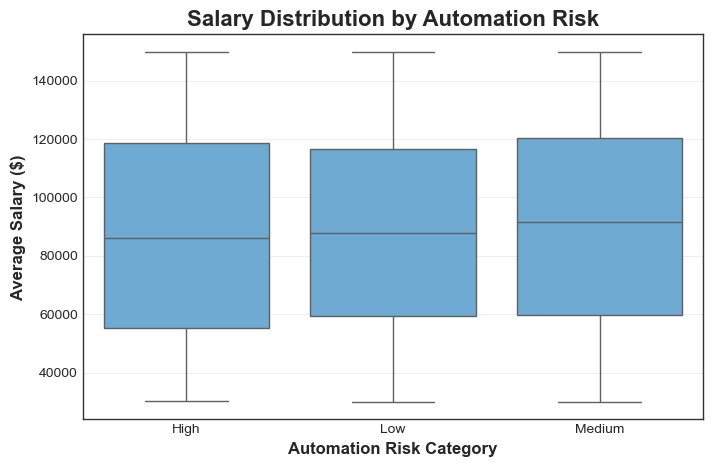

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Risk_Category',
    y='Average_Salary',
    data=df1,
   
)
plt.title("Salary Distribution by Automation Risk", fontsize=16)
plt.xlabel("Automation Risk Category", fontsize=12)
plt.ylabel("Average Salary ($)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\ai_impact_salarydistribution_AutomationRisk", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
Which education level offers the best balance of salary and job security?

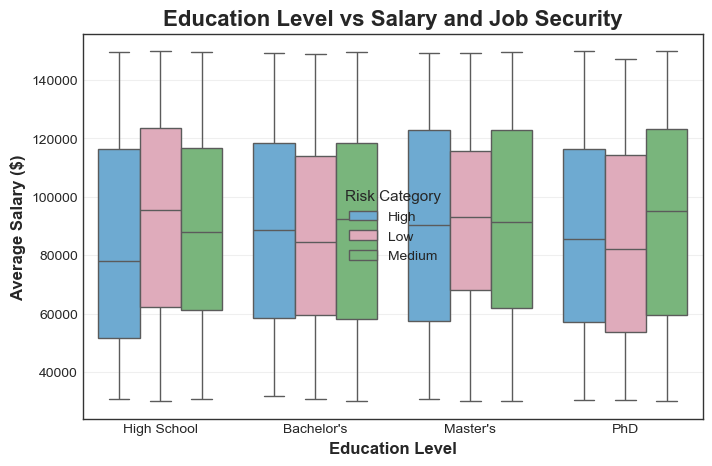

In [17]:
# Map education to ordered categories for better plotting
education_order = ["High School", "Bachelor's", "Master's", "PhD"]

plt.figure(figsize=(8,5))
sns.boxplot(
    x='Education_Level',
    y='Average_Salary',
    hue='Risk_Category',
    data=df1,
    order=education_order
)
plt.title("Education Level vs Salary and Job Security", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Average Salary ($)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Risk Category')
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\ai_impact_education_salary_jobsecurity", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
Which jobs combine high salary, high tech growth, and low automation risk?

In [23]:
df1['Composite_Score'] = (
    (df1['Average_Salary'] / df1['Average_Salary'].max()) * 0.4 +
    (df1['Tech_Growth_Factor'] / df1['Tech_Growth_Factor'].max()) * 0.4 -
    (df1['Automation_Probability_2030'] * 0.2)
)

In [25]:
top_future_jobs = (
    df1.groupby("Job_Title")["Composite_Score"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)


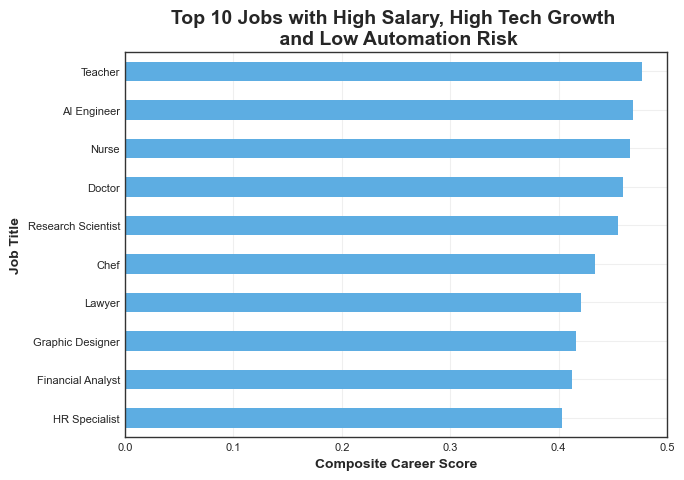

In [27]:
plt.figure(figsize=(7,5))
top_future_jobs.plot(kind='barh')
plt.xlabel("Composite Career Score", fontsize=10)
plt.ylabel("Job Title", fontsize=10)
plt.title(
    "Top 10 Jobs with High Salary, High Tech Growth \n and Low Automation Risk",
    fontsize=14
)
plt.gca().invert_yaxis()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()
